In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Load the Iris dataset
data = pd.read_csv("iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
# Function to calculate Euclidean distance
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to perform K-Means clustering
def kmeans(data, k, max_iterations):
    # Initialize centroids randomly from the data points
    centroids = data[np.random.choice(len(data), k, replace=False)]
    assignments = np.zeros(len(data))

    for _ in range(max_iterations):
        # Assign each point to the nearest centroid
        for i, point in enumerate(data):
            distances_to_centroids = [distance(point, centroid) for centroid in centroids]
            assignments[i] = np.argmin(distances_to_centroids)

        # Update centroids based on mean of assigned points
        for cluster in range(k):
            cluster_data = data[assignments == cluster]
            if len(cluster_data) > 0:  # Avoid division by zero
                centroids[cluster] = np.mean(cluster_data, axis=0)

    return centroids, assignments

In [15]:
# Convert features to a numpy array
X = data.iloc[:, :-1].values

# Define number of clusters and maximum iterations
k = 3
max_iterations = 100

# Perform K-Means clustering
centroids, assignments = kmeans(X, k, max_iterations)

# Organize data into clusters
clustered_data = []
for i in range(k):
    clustered_data.append(X[assignments == i])

# Print data points for each cluster
for i in range(k):
    print(f"\nCluster {i+1} data points:")
    #print(data.iloc[np.where(assignments == i)[0]])


Cluster 1 data points:

Cluster 2 data points:

Cluster 3 data points:


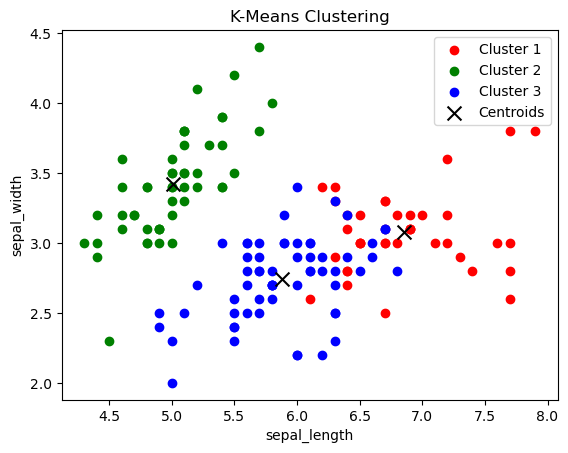

In [8]:
# Visualize the clusters
colors = ['red', 'green', 'blue']
for i in range(k):
    plt.scatter(clustered_data[i][:, 0], clustered_data[i][:, 1], c=colors[i], label=f"Cluster {i+1}")

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')

# Label axes and add title
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title("K-Means Clustering")
plt.legend()
plt.show()